**Introduction**

Getting a ride from an Uber driver is beautiful in its simplicity. Simply open the app, set the pickup location, request a car, get picked up and pay with the tap of a button. But there’s a great deal of data wrangling going on to make all of this happen in a (relatively) smooth process.Of course, collecting all this information is just one step in the big data journey. The real question is — how does Uber determine the best way to make decisions using this information? How do they glean actionable points out of the data they collect.

The goal of this project is to visualize the data in different ways and point out any interesting discoveries.

**Reading the Data **

Our data comprises of 6 numbers of csv files from April 2014 to September 2014. We need to read them individually using read.csv function & then later on combine all of these files so as to form a single data frame using rbind function as shown below. 

In [116]:
# Reading files one by one
apr_data=read.csv("../input/cab-data-sets/uber-raw-data-apr14.csv")
may_data=read.csv("../input/cab-hailing-data-sets/uber-raw-data-may14.csv")
jun_data=read.csv("../input/cab-hailing-data-sets/uber-raw-data-jun14.csv")
jul_data=read.csv("../input/cab-hailing-data-sets/uber-raw-data-jul14.csv")
aug_data=read.csv("../input/cab-hailing-data-sets/uber-raw-data-aug14.csv")
sep_data=read.csv("../input/cab-hailing-data-sets/uber-raw-data-sep14.csv")

In [117]:
uber_data=rbind(apr_data,may_data,jun_data,jul_data,aug_data,sep_data)

Let's have a glance at our combined data 

In [118]:
head(uber_data)

,Date.Time,Lat,Lon,Base
,<fct>,<dbl>,<dbl>,<fct>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


We can see that our data has four columns. They are Date.Time, latitude,longitude & Base. Let's dig in further to see what does our Base column look like in terms of frequency table.  

In [119]:
table(uber_data$Base)


 B02512  B02598  B02617  B02682  B02764 
 205673 1393113 1458853 1212789  263899 

Clearly from above frequency table there are in total 5 numbers of base values.There are

*205673 observations for B02512,
393113 observations for B02598,
1458853 observations for B02617, 
1212789 observations for B02682 &
263899 observations for B02764*

They are various base codes corresponds to base names like Unter,Hinter,Weiter,Schmecken & 
Danach-NY. These are Uber's bases located in New York. Each uber pickup is 
affiliated with a TLC (Taxi and Limousine Commission) company base.


**Importing Few Packages- **

We will import few packages that we will use in this data visualization project.I will be looking at libraries like 

ggplot2 - for data visualization & is widely used for creating various aesthetics plots.

ggthemes - just an add on to ggplot2. It enables us to create themes & scales.

lubridate - It's needed Since our dataset has time frame. It help to understand our data in separate time categories. 

dplyr - We will use this for data wrangling.

tidyr - to tidy our data.

DT - help us to interface with the JavaScript Library called – Datatables.

Scales - with the help of scales we can map the data to the correct scales with well placed axes & legends. 


In [120]:
# Loading libraries...
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

We will now glimpse our whole data.We will make use of dplyr package & function we will use is glimpse. Upon doing so we see that it has somewhere around 45 Lakh rows/observations & 4 numbers of variables or columns. Further Date.Time column has come out to be factor & we need to do some formatting so as to get it in date time format. 



In [121]:
glimpse(uber_data)

Observations: 4,534,327
Variables: 4
$ Date.Time <fct> 4/1/2014 0:11:00, 4/1/2014 0:17:00, 4/1/2014 0:21:00, 4/1/2…
$ Lat       <dbl> 40.7690, 40.7267, 40.7316, 40.7588, 40.7594, 40.7383, 40.72…
$ Lon       <dbl> -73.9549, -74.0345, -73.9873, -73.9776, -73.9722, -74.0403,…
$ Base      <fct> B02512, B02512, B02512, B02512, B02512, B02512, B02512, B02…


Let's see the class of Date.Time column. Its factor. 

In [122]:
class(uber_data$Date.Time)

[1] "factor"

**Formatting of Date.Time column- **

We will use 'as.POSIXct' function to convert from factor type to one column of the structure POSIXct as shown below. 

In [123]:
uber_data$Date.Time <- as.POSIXct(uber_data$Date.Time, format = "%m/%d/%Y %H:%M:%S")

We can quickly check if my class of my variable Date.Time has been changed or not

In [124]:
class(uber_data$Date.Time)

[1] "POSIXct" "POSIXt"

Extracting Time from Date.Time column & creating another column 'Time'. 

In [125]:
uber_data$Time = format(as.POSIXct(uber_data$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

Let's see if we are able to create another column Time or not. 

In [126]:
head(uber_data)

glimpse(uber_data)

,Date.Time,Lat,Lon,Base,Time
,<dttm>,<dbl>,<dbl>,<fct>,<chr>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00


Observations: 4,534,327
Variables: 5
$ Date.Time <dttm> 2014-04-01 00:11:00, 2014-04-01 00:17:00, 2014-04-01 00:21…
$ Lat       <dbl> 40.7690, 40.7267, 40.7316, 40.7588, 40.7594, 40.7383, 40.72…
$ Lon       <dbl> -73.9549, -74.0345, -73.9873, -73.9776, -73.9722, -74.0403,…
$ Base      <fct> B02512, B02512, B02512, B02512, B02512, B02512, B02512, B02…
$ Time      <chr> "00:11:00", "00:17:00", "00:21:00", "00:28:00", "00:33:00",…


From above we can see that now we have 5 columns or variables instead of 4. Next we will parse Date-Time With Year, Month, And Day, Hour, Minute, And Second Components using ymd_hms function from lubridate package as shown below.

In [127]:
uber_data$Date.Time <- ymd_hms(uber_data$Date.Time)

Next we will extract day, month, Year & Day of week from Date.Time column & then converting it into factor type. Ideally We will end up having 9 variables. 

In [128]:
uber_data$day =factor(day(uber_data$Date.Time))
uber_data$month = factor(month(uber_data$Date.Time, label = TRUE))
uber_data$year = factor(year(uber_data$Date.Time))
uber_data$dayofweek = factor(wday(uber_data$Date.Time, label = TRUE))

Let'see how our data look like now using head & glimpse function as shown below. Clearly we have been able to extract day,month,year & day of week successfully.  

In [129]:
head(uber_data)

glimpse(uber_data)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek
,<dttm>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<ord>,<fct>,<ord>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue


Observations: 4,534,327
Variables: 9
$ Date.Time <dttm> 2014-04-01 00:11:00, 2014-04-01 00:17:00, 2014-04-01 00:21…
$ Lat       <dbl> 40.7690, 40.7267, 40.7316, 40.7588, 40.7594, 40.7383, 40.72…
$ Lon       <dbl> -73.9549, -74.0345, -73.9873, -73.9776, -73.9722, -74.0403,…
$ Base      <fct> B02512, B02512, B02512, B02512, B02512, B02512, B02512, B02…
$ Time      <chr> "00:11:00", "00:17:00", "00:21:00", "00:28:00", "00:33:00",…
$ day       <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ month     <ord> Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr,…
$ year      <fct> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,…
$ dayofweek <ord> Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue,…


Let us extract hour, minutes & seconds from newly created Time column.

In [130]:
uber_data$hour <- factor(hour(hms(uber_data$Time)))
uber_data$minute <- factor(minute(hms(uber_data$Time)))
uber_data$second <- factor(second(hms(uber_data$Time)))

Upon glimpse we find out that now our variables has increased to 12 as shown below. 

In [131]:
head(uber_data)

glimpse(uber_data)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
,<dttm>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


Observations: 4,534,327
Variables: 12
$ Date.Time <dttm> 2014-04-01 00:11:00, 2014-04-01 00:17:00, 2014-04-01 00:21…
$ Lat       <dbl> 40.7690, 40.7267, 40.7316, 40.7588, 40.7594, 40.7383, 40.72…
$ Lon       <dbl> -73.9549, -74.0345, -73.9873, -73.9776, -73.9722, -74.0403,…
$ Base      <fct> B02512, B02512, B02512, B02512, B02512, B02512, B02512, B02…
$ Time      <chr> "00:11:00", "00:17:00", "00:21:00", "00:28:00", "00:33:00",…
$ day       <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ month     <ord> Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr, Apr,…
$ year      <fct> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,…
$ dayofweek <ord> Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue, Tue,…
$ hour      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3,…
$ minute    <fct> 11, 17, 21, 28, 33, 33, 39, 45, 55, 1, 19, 48, 49, 11, 25, …
$ second    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


**Data Visualization in ggplot- **

Let's see how passengers fares through out the day & plot the number of trips by the hours in a day. We will make use of 'group by' & 'summarise' function from dplyr package in order to achieve that as shown below. Also with the help of chaining operator '%>%' we will chain together in a single statement, & our variables doesn't need to store the intermediate results.   

In [132]:
hour_data = uber_data %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 

Upon closer look at 'hour_data' We can say that the number of trips are higher during evening especially after 5 pm & 6 pm.  

In [133]:
head(hour_data,24)

hour,Total
<fct>,<int>
0,103836
1,67227
2,45865
3,48287
4,55230
5,83939
6,143213
7,193094
8,190504


If we plot number of trips as per hours in ggplot we will get something like this. 

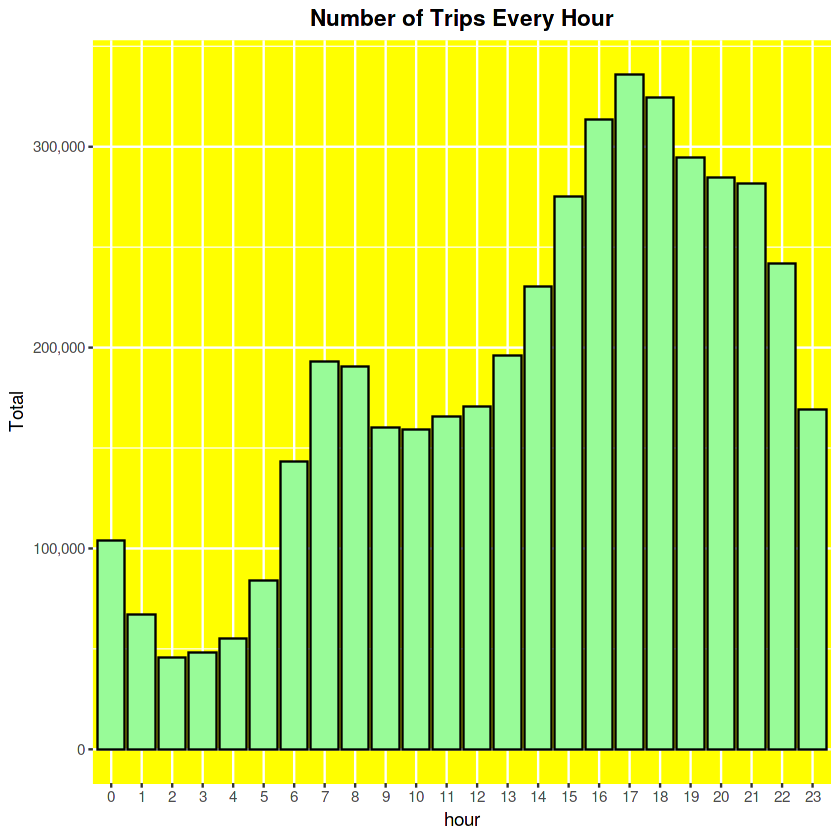

In [134]:
ggplot(hour_data, aes(x=hour, y=Total)) + 
        geom_bar( stat = "identity", fill = "palegreen", color = "black") +
           ggtitle("Number of Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)+theme(panel.background=element_rect(fill="yellow"))+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))
            

What if we want to see number of trips on an hourly & monthly basis. We need to group our data as per hour & month & plot the same as demonstrated below. 

In [135]:
month_hour = uber_data %>%
          group_by(month, hour) %>%
             summarize(Total = n())


Our month_hour data will look like this. In addition to hour column there is month column also now along with total trips. 

In [136]:
head(month_hour)

month,hour,Total
<ord>,<fct>,<int>
Apr,0,11910
Apr,1,7769
Apr,2,4935
Apr,3,5040
Apr,4,6095
Apr,5,9476


If we want to plot this 

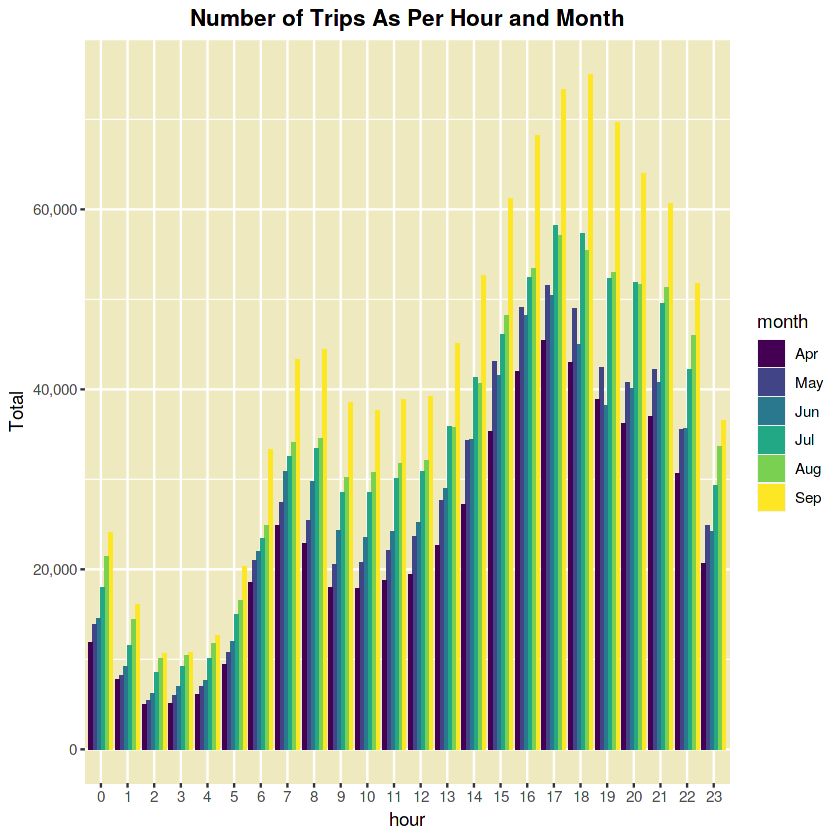

In [151]:
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity",position="dodge") +
          ggtitle("Number of Trips As Per Hour and Month") +
           scale_y_continuous(labels = comma)+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="lemonchiffon2"))

From above plot we can say that irrespective of month there is always surge in the number of trips around 5 pm & 6 pm onwards. This could be due to surge of office goers who want to return their home after toiling so hard at their office.Also we can see that the  trips are getting reduced 10 pm onwards. 


**Plotting by number of trips during every day of the month-** 

In [138]:
day_group <- uber_data %>%
          group_by(day) %>%
             summarize(Total = n()) 

head(day_group)

day,Total
<fct>,<int>
1,127430
2,143201
3,142983
4,140923
5,147054
6,139886


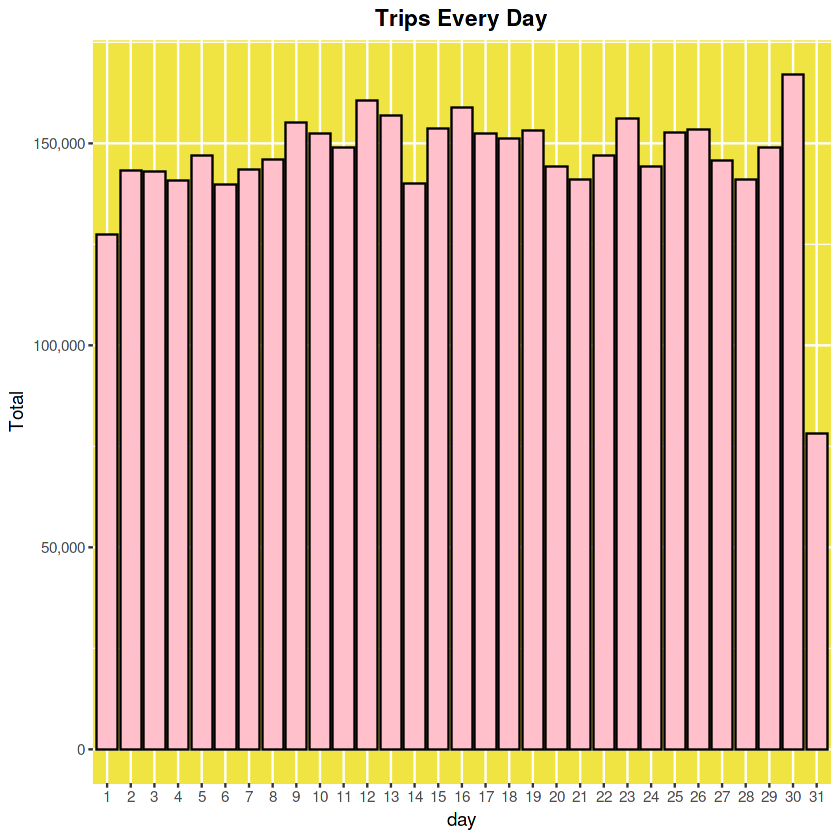

In [139]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "pink",color="black") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="#F0E442"))

We can see from the resulting visualization above that number of trips are usually more on 30th of every month as compared to other days of month.That's how the trend shows.

Let's see how our passenger fares day & month wise. 

In [140]:
day_month_group <- uber_data %>%
         group_by(month, dayofweek) %>%
             summarize(Total = n())

head(day_month_group)

month,dayofweek,Total
<ord>,<ord>,<int>
Apr,Sun,51251
Apr,Mon,60861
Apr,Tue,91185
Apr,Wed,108631
Apr,Thu,85067
Apr,Fri,90303


In order to visualize this Let us first create a vector of colors to be implemented in our plotting function. Then we will write ggplot as shown below. 

In [141]:
# Creating a palette
colors=c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")

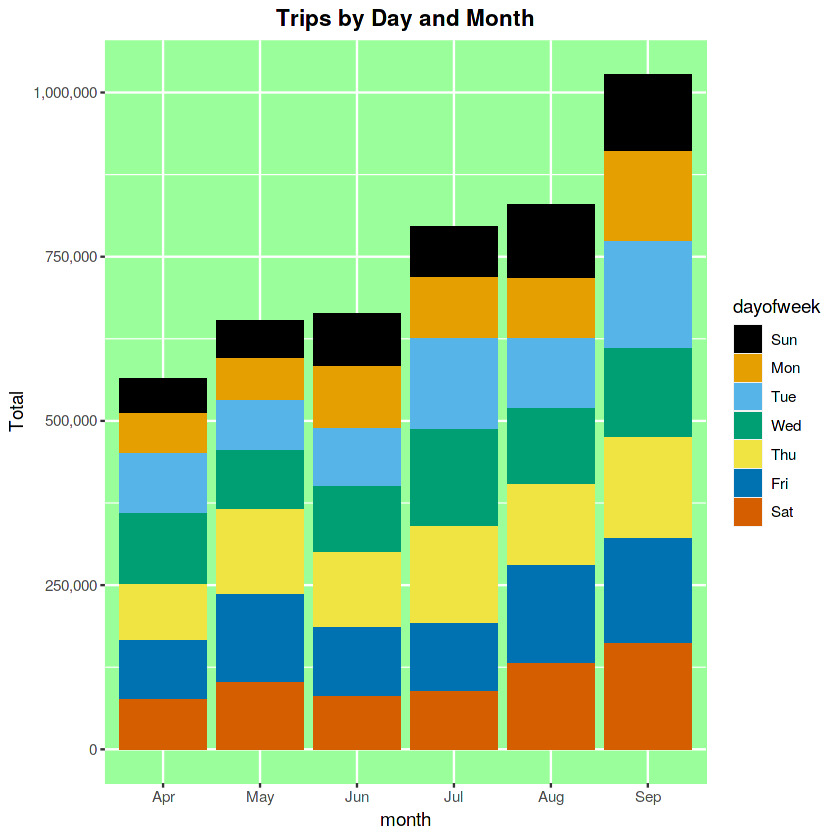

In [142]:
ggplot(day_month_group, aes(month, Total, fill = dayofweek)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors) +theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="palegreen1"))

From above visualization we observe that the trips are more in September month. Also number of trips are less in sunday irrespective of any month. 

Let's analyse trips made each month. 

In [143]:
month_group = uber_data %>%
          group_by(month) %>%
             summarize(Total = n()) 

head(month_group)

month,Total
<ord>,<int>
Apr,564516
May,652435
Jun,663844
Jul,796121
Aug,829275
Sep,1028136


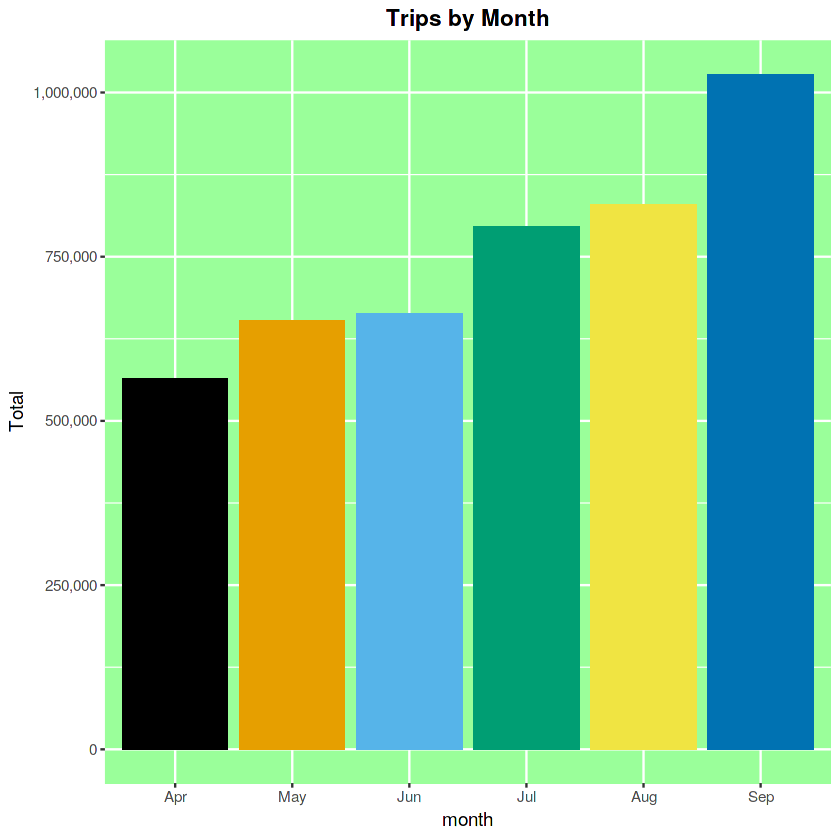

In [144]:
ggplot( month_group, aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="palegreen1"))

Lets analyse trips against those bases. 

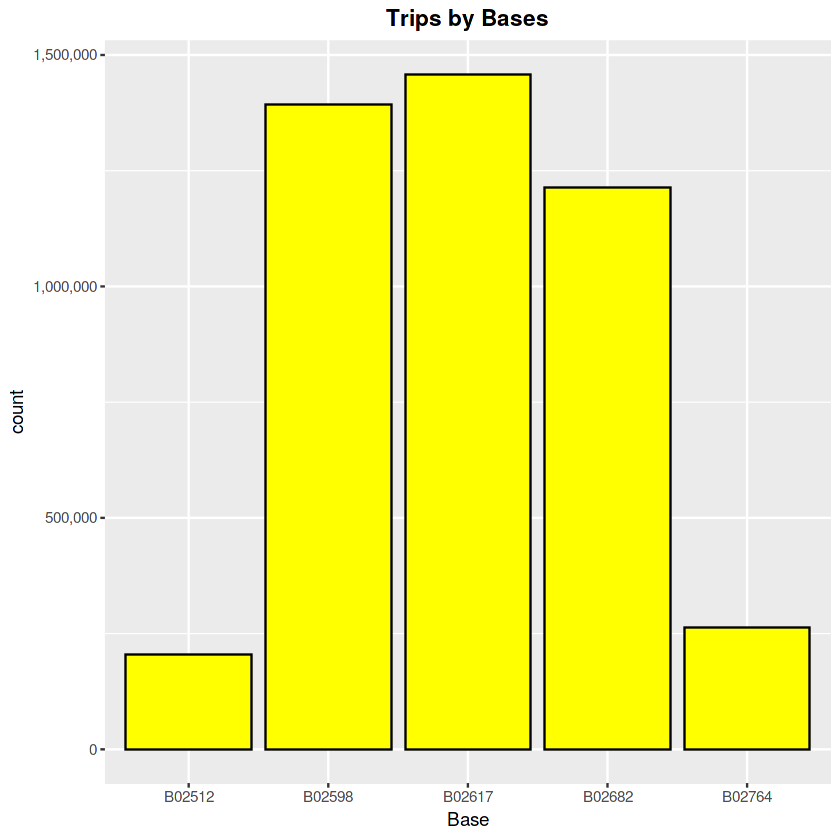

In [145]:
ggplot(uber_data,aes(x=Base))+geom_bar(fill="yellow",colour="black")+scale_y_continuous(label=comma)+ggtitle("Trips by Bases")+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))

Clearly trips are more for base B02617 followed by B02598,B02682 & so on. Now if we want to visualize trips by bases & month then we can plot that as well. 

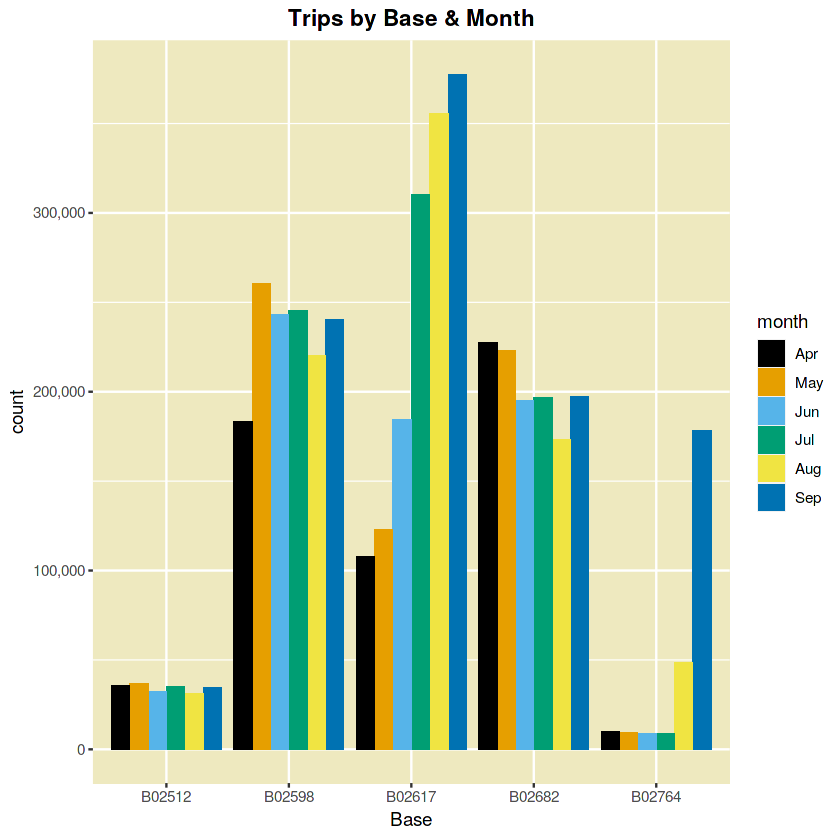

In [146]:
ggplot(uber_data,aes(Base,fill=month))+geom_bar(position="dodge")+scale_y_continuous(label=comma)+ggtitle("Trips by Base & Month")+scale_fill_manual(values=colors)+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="lemonchiffon2"))

From above visualization we conclude that for base B02617 & B02764 September month happens to be the month of highest trips. Let's see how our plot looks like with bases & dayofweek. 

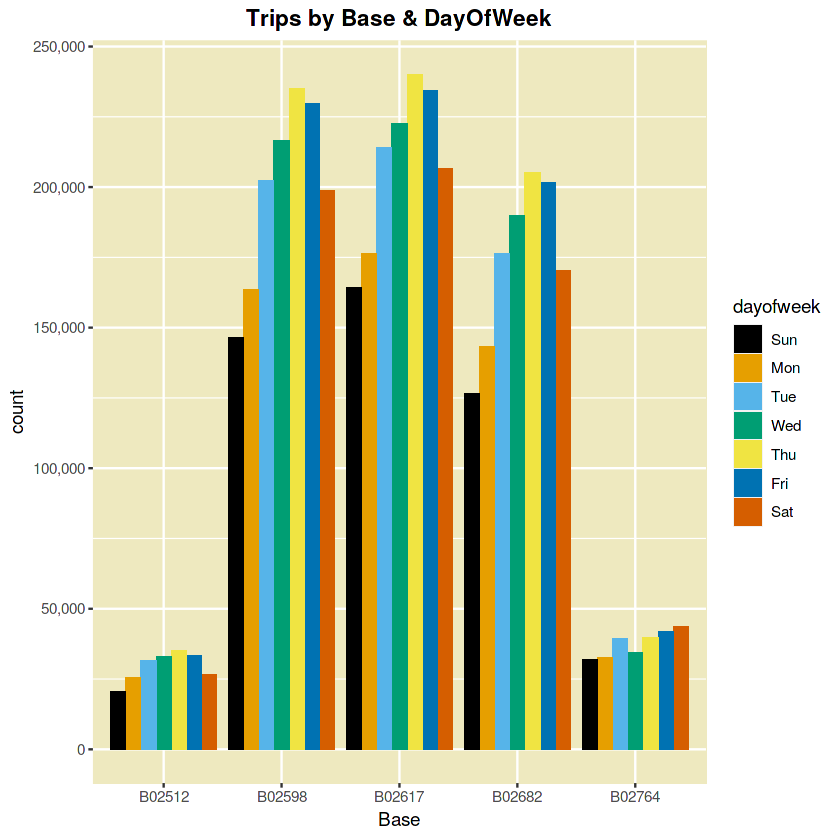

In [150]:
ggplot(uber_data,aes(Base,fill=dayofweek))+geom_bar(position="dodge")+ggtitle("Trips by Base & DayOfWeek")+scale_y_continuous(label=comma)+scale_fill_manual(values=colors)+theme(plot.title=element_text(hjust=0.5,face="bold",colour="black"))+theme(panel.background=element_rect(fill="lemonchiffon2"))

From above we conclude that Thursday observed highest trips for the three bases – B02598, B02617, B02682.